## **Coffee Taste Classifier Using Random Forest for Vivace Innovazione**

By : Kresna Fajri Wicaksana, Member of team 3P. 


### **Import Module**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,LabelBinarizer,MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer
import graphviz

### **Accessing Dataset** 

In [2]:
# dibuat data generator untuk dummy data model machine learning
coffee_data = pd.read_csv("coffee.csv")
coffee_data

,Unnamed: 0,ID,Country of Origin,Altitude,Number of Bags,Bag Weight,Harvest Year,Grading Date,Variety,Status,...,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Coffee Age,Altitude_Category
0,0,0,Colombia,1815.0,1,35 kg,2021-01-01,"September 21st, 2022",Castillo,Completed,...,0,89.33,11.8,0,0,green,3,2023-09-21,993,Highlands
1,1,1,Taiwan,1200.0,1,80 kg,2021-01-01,"November 15th, 2022",Gesha,Completed,...,0,87.58,10.5,0,0,blue-green,0,2023-11-15,1048,Mid-Altitude
2,2,2,Laos,1300.0,19,25 kg,2021-01-01,"November 15th, 2022",Java,Completed,...,0,87.42,10.4,0,0,yellowish,2,2023-11-15,1048,Highlands
3,3,3,Costa Rica,1900.0,1,22 kg,2022-01-01,"September 21st, 2022",Gesha,Completed,...,0,87.17,11.8,0,0,green,0,2023-09-21,628,Highlands
4,4,4,Colombia,1975.0,2,24 kg,2022-01-01,"March 6th, 2023",Red Bourbon,Completed,...,0,87.08,11.6,0,2,yellow-green,2,2024-03-05,794,Highlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,950.0,2240,60 kg,2022-01-01,"February 2nd, 2023",Mundo Novo,Completed,...,0,80.08,11.4,0,0,green,4,2024-02-02,762,Mid-Altitude
203,203,203,Nicaragua,1200.0,300,30 kg,2022-01-01,"March 3rd, 2023",SHG,Completed,...,0,80.00,10.4,0,2,green,12,2024-03-02,791,Mid-Altitude
204,204,204,Laos,1300.0,343,60 kg,2021-01-01,"November 11th, 2022",Catimor,Completed,...,0,79.67,11.6,0,9,green,11,2023-11-11,1044,Highlands
205,205,205,El Salvador,1200.0,1,2 kg,2023-01-01,"March 8th, 2023",Maragogype,Completed,...,0,78.08,11.0,0,12,bluish-green,13,2024-03-07,431,Mid-Altitude


In [3]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            207 non-null    int64  
 1   ID                    207 non-null    int64  
 2   Country of Origin     207 non-null    object 
 3   Altitude              207 non-null    float64
 4   Number of Bags        207 non-null    int64  
 5   Bag Weight            207 non-null    object 
 6   Harvest Year          207 non-null    object 
 7   Grading Date          207 non-null    object 
 8   Variety               207 non-null    object 
 9   Status                207 non-null    object 
 10  Processing Method     207 non-null    object 
 11  Aroma                 207 non-null    float64
 12  Flavor                207 non-null    float64
 13  Aftertaste            207 non-null    float64
 14  Acidity               207 non-null    float64
 15  Body                  2

In [4]:
#cek jumlah data unik di Total Cup Points
coffee_data["Total Cup Points"].nunique()

#aturan Sturges
bin_amount = 1 + np.log2(len(coffee_data["Total Cup Points"]))
bin_amount

8.693486957499324

Berdasarkan aturan Sturges, dari 81 nilai unik, dapat dibentuk 9 bin. 

In [5]:
#Lakukan proses binning untuk mengelompokkan data
#dari Total Cup Points menjadi data rasa
min_value = np.min(coffee_data["Total Cup Points"])
max_value = np.max(coffee_data["Total Cup Points"])
bin_width = int((max_value-min_value)/bin_amount)


coffee_taste = ["Chocolate","Honeyed","Fruity","Nutty","Caramel","Butter","Malt","Maple","Cedar"]

# buat fungsi untuk menggolongkan total cup points menjadi rasa
bins = pd.cut(coffee_data["Total Cup Points"], bins = 9, labels = coffee_taste)
coffee_data["Taste"] = bins
coffee_data["Taste"].value_counts()

Taste
Caramel      60
Butter       54
Nutty        45
Malt         18
Fruity       12
Honeyed       9
Maple         6
Chocolate     2
Cedar         1
Name: count, dtype: int64

Text(0, 0.5, 'Frekuensi')

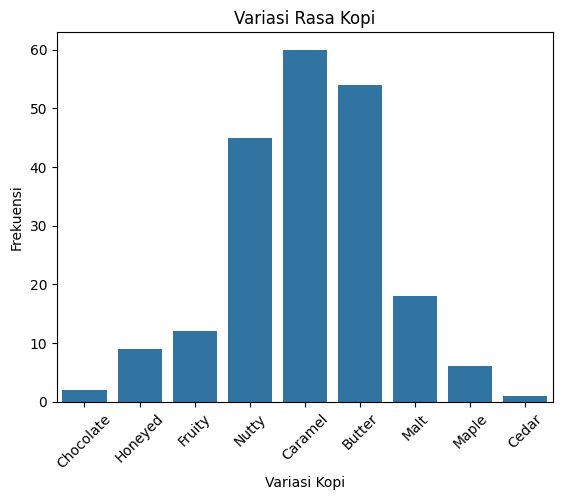

In [6]:
#Visualisasi data
plt.title("Variasi Rasa Kopi")
sns.barplot(data = coffee_data["Taste"].value_counts())
plt.xlabel("Variasi Kopi")
plt.xticks(rotation=45)
plt.ylabel("Frekuensi")


In [7]:
#Lakukan binning kedua, dengan menggunakan data altitudem diubah menjadi metode roasting.
#cek ada berapa jumlah nilai unique di Altitude
print(coffee_data["Altitude"].unique())
print(f'Amount of unique value in Altitude :  {coffee_data["Altitude"].nunique()}')

bin_amount_roast = 1 + np.log2(len(coffee_data["Altitude"]))
print(f'Jumlah bin yang mungkin : {bin_amount_roast}')

#labelling data
roast_type = ['Light Roast', "Medium Roast", "Dark Roast", "Very Dark Roast"]


bins = np.random.choice(roast_type, coffee_data.shape[0])
coffee_data["Roast Type"] = bins
coffee_data["Roast Type"].value_counts()

[1815.  1200.  1300.  1900.  1975.  1668.  1250.  1550.  2000.  1950.
 1850.  1100.  1585.   850.  1600.  1350.  1060.   600.   200.   668.
 2250.  1700.   650.  1750.   400.  1000.   800.  1905.   150.  4700.
  375.   230.  1654.  1400.  4895.   250.   700.  1450.   520.  1368.
 1943.  2361.  1500.  2100.  1800.  1675.  1411.  5273.   500.   300.
 1470.   325.   275.  1390.  1650.  1302.5  750.   950.  1150.   340.
 1280.   900.   165.   465.   640.  1340.   139.  1275.  1040.   140.
 1725.   460.  5400.  1574.   435.   975. ]
Amount of unique value in Altitude :  76
Jumlah bin yang mungkin : 8.693486957499324


Roast Type
Light Roast        62
Medium Roast       57
Very Dark Roast    46
Dark Roast         42
Name: count, dtype: int64

### **Preprocessing Data**

Sebelum melakukan pembuatan model, kita akan lakukan preproecssing pada data untuk membagi data antara data latih dan data uji, menskalakan data numerik dan melakukan encoding pada data kategorikal

In [8]:
numerical_features = ["Sweetness", "Acidity","Aroma" ,"Flavor", "Aftertaste", "Body", "Balance", "Uniformity","Overall","Clean Cup", "Total Cup Points",'Moisture Percentage']
categorical_features = ["Roast Type"]

#preprocessing data
x = coffee_data[numerical_features + categorical_features]
y = coffee_data["Taste"]

#pembagian data latih data uji
#dilakukan pembagian terlebih dahulu baru dilakukan data scaling dan data encoding, untuk mencegah data leakage
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#scaling data
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_features),
        ('cat',cat_transformer, categorical_features)
    ]
)

#Transformasi Kolom Data Latih dan Data Uji dari Prediktor
scaled_x_train = preprocessor.fit_transform(x_train)
scaled_x_test = preprocessor.fit_transform(x_test)


encoder = OneHotEncoder(sparse_output=False, categories = [coffee_taste])
encoded_y_train = pd.DataFrame(encoder.fit_transform(y_train.values.reshape(-1,1)))
encoded_y_test = pd.DataFrame(encoder.fit_transform(y_test.values.reshape(-1,1)))

y_train_labels = np.argmax(encoded_y_train.values, axis = 1)
y_test_labels = np.argmax(encoded_y_test.values, axis = 1)

print(y_test_labels.shape)
print(y_test_labels)

(42,)
[3 0 4 3 3 4 3 3 4 3 4 5 3 5 3 4 3 6 5 6 0 5 4 5 5 3 4 3 6 5 4 4 4 2 5 5 6
 7 4 3 3 3]


### **Model Building and Model Fitting**

Berikut akan dilakukan proses fitting antara data yang telah diproses dengan data output (Y). Akan digunakan jenis machine learning classifier, karena kita akan memprediksi kelas. Akan dicoba beberapa model machine learning seperti SVM dan juga Random Forest. 

In [9]:
from sklearn import metrics
from keras.metrics import categorical_accuracy
from sklearn.tree import export_graphviz

model_rf = RandomForestClassifier(n_estimators = 750, max_depth = 10, min_samples_split=5)

#fitting model 
model_rf.fit(scaled_x_train,encoded_y_train)
#predict
y_predict = np.argmax(model_rf.predict(scaled_x_test),axis = 1)

accuracy = accuracy_score(y_test_labels,y_predict)

print(f"Tingkat keakuratan model Random Forest sebesar : {accuracy}")

scaled_x_train = pd.DataFrame(scaled_x_train)
print(scaled_x_train)
#Tampilkan visualisasi random forest graph
dot_data = export_graphviz(model_rf.estimators_[0], out_file = None,
                           feature_names = scaled_x_train.columns,
                           class_names = coffee_taste,
                           filled = True)

#tampilkan dengan graphviz
graph_random_forest = graphviz.Source(dot_data)
graph_random_forest.render('random_forest_tree')

Tingkat keakuratan model Random Forest sebesar : 0.8095238095238095
      0         1         2         3         4         5         6   \
0    0.0 -1.423724 -1.131738 -1.207000 -0.691818 -0.650202 -0.914390   
1    0.0 -0.449137  0.375686  0.297580  0.230830 -0.307033 -0.285747   
2    0.0 -0.449137 -0.212577  0.627853 -0.101323 -0.307033  0.382186   
3    0.0  1.188169  0.706584  0.921430  1.153477 -0.307033  0.382186   
4    0.0 -0.761005 -0.543475 -0.619847 -1.023971 -0.307033 -0.914390   
..   ...       ...       ...       ...       ...       ...       ...   
160  0.0 -1.423724 -1.131738 -0.913423 -1.023971 -1.379437 -1.268002   
161  0.0  0.213582  1.000715  0.921430  0.526077  0.079033  0.382186   
162  0.0 -0.098286 -0.212577 -0.289573 -0.396571 -0.307033  0.067865   
163  0.0  0.213582 -0.543475  0.627853  0.230830  0.765372  0.382186   
164  0.0  0.525450 -0.543475 -0.913423 -0.396571  0.079033 -0.600068   

           7         8    9         10        11   12   13   14   1

'random_forest_tree.pdf'

### **Conclusion**

Berdasarkan dari hasil proses fitting model terhadap dataset kopi. Diketahui bahwa model Random Forest Classifier mampu memprediksi klasifikasi rasa kopi berdasarkan data dengan tingkat keakuratan 80%. Ini masih bisa berubah dan masih mungkin mengalami peningkatan tingkat akurasi seiring dengan banyaknya data yang dilatih pada model. 